# LLM Post-Training Internship Exercise

Welcome to the Hugging Face internship exercise! In our recent blog post on [_Scaling Test-Time Compute with Open Models_](https://huggingface.co/spaces/HuggingFaceH4/blogpost-scaling-test-time-compute), we explored how search methods and reward models can be used to enhance the performance of LLMs on math problems.

In this exercise, you will be replicating a baseline method from this approach: **Best-of-N sampling with _weighted_ selection**. This approach involves sampling $N$ independent solutions per problem, scoring the solutions with a reward model, and then grouping solutions with the same final answer. The rewards are then summed per group and the final answer with the highest weighted score is chosen as the Best-of-N solution. For more details, refer to the [DeepMind](http://hf.co/papers) and [Math-Shepherd](https://huggingface.co/papers/2312.08935) papers.

We will use the following models from the Hugging Face Hub:
- [**Qwen/Qwen2.5-1.5B-Instruct**](https://huggingface.co/Qwen/Qwen2.5-1.5B-Instruct): A 1.5 billion parameter chat model with decent math capabilities for its size.
- [**Skywork/Skywork-o1-Open-PRM-Qwen-2.5-1.5B**](https://huggingface.co/Skywork/Skywork-o1-Open-PRM-Qwen-2.5-1.5B): a 1.5 billion parameter process reward model (PRM). Unlike conventional reward models, PRMs are trained to provide a _sequence_ of scores, one for each step in the LLM's reasoning process.

💡 These models are small enough to run on Google Colab using a free T4 GPU, so make sure you have activated this runtime before progressing!

Concretely, we would like you to work through the following steps:
1. Create a filtered subset of 20 level 1-3 problems from the [MATH-500 dataset](https://huggingface.co/datasets/HuggingFaceH4/MATH-500) (smol models cannot really solve the harder levels). Using these problems:
  - Generate $N=1$ solutions for each problem using greedy decoding; this will be used as a baseline. We recommend prompting the model with chain-of-thought and instructing it to ensure the final answers are contained in `\boxed{answer}` (this helps with parsing).
  - Compute the accuracy of your solutions compared to the ground truth.
3. Sample $N=16$ solutions per problem and score them using the Skywork reward model. Although this model is a PRM, we will use the **_last step prediction_** as our final reward for the full solution. Refer to Appendix E of the [DeepMind](http://hf.co/papers) paper for guidance on using the last step prediction; this involves selecting the final score in the PRM's output sequence.
4. Using the solutions and rewards from Step 2, compute the Best-of-N accuracy with _**weighted**_ selection.
5. Create a dataset of the problems with the greedy and Best-of-N model solutions and push it to the Hugging Face Hub. Then, create a basic [dataset card](https://huggingface.co/docs/hub/datasets-cards) that describes how the dataset was constructed.
6. Create some plots and analysis of the performance of this approach compared to the greedy baseline. For example, which problems was Best-of-N able to solve that greedy decoding couldn't? If time permits, explore how other parameters impact the performance. For example, how accuracy varies with $N$ or temperature.

**Try to spend ~3 hours on the exercise.**

## Tips

* Some steps in the exercise can take ~15 minutes to run on Colab. We recommend familiarising yourself with the remaining steps while waiting for the code to run.
* You can use this [simple helper function](https://gist.github.com/lewtun/9c2ce1937b741404090a3dc4c7c022b3) to extract the answers from the `\boxed{answer}` substrings. In practice, we would use SymPy equivalence but that adds extra complexity.
* The Skywork reward model uses custom modelling code and must be loaded with `trust_remote_code=True`. The authors provide a [repo](https://github.com/SkyworkAI/skywork-o1-prm-inference) with some inference code, but it is possible to use the model directly in `transformers` with `AutoModel.from_pretrained(...)`. You may want to refer to the repo for the PRM scoring helper functions. You will also need to normalize the output logits with a sigmoid function!
* You are welcome to use LLMs (GPT-4o, Claude 3.5, DeepSeek V3, etc) to help you solve this exercise! The only thing we ask is that you indicate which parts of the code were co-authored by an LLM, and that you could explain how the code works if asked :)

## Assessment rubric

What we want to see is whether:

- You have hands-on knowledge of Python and a basic familiarity with the Hugging Face ecosystem.
- You have a good understanding of prompting LLMs and how to generate responses from them.
- You know how to use reward models to improve the quality of language model responses.
- Your code and written explanations can be understood by others. In particular, we like to see simple, readable code over complex over-engineered solutions.


We're especially interested in understanding how you approach projects, so it is important that you can explain the steps you take throughout the notebook. We want to understand what you have tried, so you will be evaluated on your comments just as much as the code itself.

If you feel that you are spending much longer on this exercise than the allotted time, please stop and simply jot down ideas for next steps if you had more time.

Good luck 🤗!

The final generated dataset can be found here -> https://huggingface.co/datasets/Priya1605/best-of-n-for-mathN/blob/main/README.md

## Setup

Run the following cell to install the dependencies needed for this exercise.

In [6]:
%pip -qqq install -U transformers datasets accelerate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [7]:
import pandas as pd
import numpy as np
from datasets import load_dataset
from transformers import AutoModelForCausalLM, AutoTokenizer, AutoModel
import matplotlib.pyplot as plt
import re
import torch
from tqdm import tqdm
import random
from typing import Optional

In [18]:
# STEP 1: LOAD DATASET FROM HF

def load_math_subset(seed=42):
    dataset = load_dataset("HuggingFaceH4/MATH-500")

    # Filter for level 1-3 problems
    filtered = [x for x in dataset['test'] if x['level'] in [1, 2, 3]]
    # Sample 20 problems
    random.seed(seed)
    return random.sample(filtered, 20)

dataset = load_math_subset()
problems = [x['problem'] for x in dataset]
levels = [x['level'] for x in dataset]
ground_truth_answers =  [x['answer'] for x in dataset]


README.md:   0%|          | 0.00/412 [00:00<?, ?B/s]

test.jsonl:   0%|          | 0.00/447k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/500 [00:00<?, ? examples/s]

In [16]:
# STEP 2: LOAD MODEL AND TOKENIZER

model_name = "Qwen/Qwen2.5-1.5B-Instruct"
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

In [17]:
# STEP 3: GENERATE GREEDY DECODING SOLUTIONS and COMPUTE ACCURACY

def generate_greedy_solutions(problems, model, tokenizer):
    """
    Generate single greedy solution for each problem
    """
    solutions = []
    for problem in tqdm(problems):
        # Can expriment with prompts more but given that we've filtered for easier levels, we can start with a simple COT prompt.
        prompt = f"Solve this math problem step by step. Provide your final answer in \\boxed{{}}:\n\n{problem['problem']}"

        inputs = tokenizer(prompt, return_tensors="pt").to(model.device)


        # Perform inference using greedy decoding
        with torch.no_grad():
            outputs = model.generate(
                **inputs,
                max_length=1024, # Increased token size as I noticed a lot of the times the explanations crossed the max_lentgh and \{boxed} wouldnt be printed.
                num_return_sequences=1,
                do_sample=False,
                temperature=0
            )
        solution = tokenizer.decode(outputs[0])
        solutions.append(solution)

    return solutions


def compute_greedy_decoding_accuracy(generated_solutions, ground_truth_solutions):
  # For now simply printing the accuracies to examine mannually as there are only 20 problems,
  # We could also find cannonical forms and then check if they're the same.
  # Another way, I can think of is to use an LLM, pass both the generated solution and the ground_truth_solution
  # and then a prompt like "Check whether these are mathematically equivalent" and make it return a json with true or false

  for gen_sol, gt_sol in zip(generated_solutions, ground_truth_solutions):
        # Check if either solution is empty and print accordingly
        if not gen_sol:
            gen_sol = "None"
        if not gt_sol:
            gt_sol = "None"

        # Printing the generated solution alongside the corresponding ground truth solution for manual inspection
        print(f"Generated: {gen_sol}\nGround Truth: {gt_sol}\n")


greedy_solutions = generate_greedy_solutions(dataset, model, tokenizer)


  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:650: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `20` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(
100%|██████████| 20/20 [04:52<00:00, 14.61s/it]


In [18]:
# Use the extract boxed solutions method from
# https://www.google.com/url?q=https%3A%2F%2Fgist.github.com%2Flewtun%2F9c2ce1937b741404090a3dc4c7c022b3
# to get numeric answers from the response generated by the LLM.
def extract_boxed_solution(text: str) -> Optional[str]:
    """
    Extracts the content of the last `\boxed{}` in a given LaTeX-style text.
    Args:
        text (str): The input string containing LaTeX-style content.
    Returns:
        Optional[str]: The extracted content inside the last `\boxed{}` if found
        and properly matched, otherwise `None`.
    Example:
        >>> extract_boxed_solution("The result is \\boxed{42}.")
        '42'
        >>> extract_boxed_solution("Unmatched \\boxed{42")
        None
    """
    try:
        start_index = text.rindex("\\boxed{")
        content_start = start_index + 7
        bracket_count = 1
        current_pos = content_start

        while bracket_count > 0 and current_pos < len(text):
            if text[current_pos] == "{":
                bracket_count += 1
            elif text[current_pos] == "}":
                bracket_count -= 1
            current_pos += 1

        if bracket_count == 0:
            content = text[content_start : current_pos - 1].strip()
            return content
        else:
            print("Error: Unmatched brackets in the text")
            return None

    except ValueError:
        print("No boxed solution found in the text")
        return None
    except Exception as e:
        print(f"Error processing text: {str(e)}")
        return None

answers = [extract_boxed_solution(solution) for solution in greedy_solutions]

Additional ideas if time permitted:



Currently, the accuracy function for greedy decoding is basic—it only prints the generated solutions, and I manually calculate the accuracy by comparing them to the ground truth. With additional time, I would refine this approach in the following ways:

*   I could reduce solutions to cannonical forms and then compare.
*   Another way to do this would be to use an LLM, pass both the generated solution and the ground_truth_solution and then a prompt like "Check whether these are mathematically equivalent" and make it return a json with true or false. This method could handle more complex equivalence checks and would be particularly useful for edge cases where symbolic processing might struggle.



  
  



In [19]:
# Genarated answers for greedy deocing
compute_greedy_decoding_accuracy(answers, ground_truth_answers)

Generated: None
Ground Truth: 2k

Generated: \frac{3}{2}
Ground Truth: \frac{3}{2}

Generated: \sqrt{117}
Ground Truth: 3\sqrt{13}

Generated: 32
Ground Truth: 4

Generated: 4210_5
Ground Truth: 4210_{5}

Generated: -5
Ground Truth: -5

Generated: \frac{4}{3}
Ground Truth: \frac43

Generated: 5
Ground Truth: 5

Generated: 3/4
Ground Truth: \frac 34

Generated: 2
Ground Truth: 2

Generated: None
Ground Truth: \text{ellipse}

Generated: 2
Ground Truth: 2

Generated: 10
Ground Truth: 10

Generated: 2000
Ground Truth: 2000

Generated: (-\infty, 5)
Ground Truth: (5,\infty)

Generated: \left(\frac{3}{2}, -1\right)
Ground Truth: \left( \frac{3}{2}, -13 \right)

Generated: 5
Ground Truth: 5

Generated: 20
Ground Truth: 2220

Generated: None
Ground Truth: 23

Generated: (a + 5)(b + 2)
Ground Truth: (a+5)(b+2)



**Accuracy: Greedy Decoding**

As we can see from above, exactly **12 out of the 20** responses match the ground truth solutions. Therefore greedy decoding accuracy is **60%**




In [ ]:
# STEP 4: GENERATE 16 SOLUTIONS FOR EACH PROMPT

def generate_N_solutions(problems, model, tokenizer, n_samples=16):
    all_solutions = []
    for problem in tqdm(problems):
        # Using same prompt as before
        prompt = f"Solve this math problem step by step. Provide your final answer in \\boxed{{}}:\n\n{problem['problem']}"

        inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
        try:
            with torch.no_grad():
              outputs = model.generate(
                  **inputs,
                  max_length=1024,
                  num_return_sequences=16,  # Set to 16 to generate 16 different outputs per prompt
                  do_sample=True,  # Enable sampling for diverse outputs
                  temperature=0.7,  # Set temperature to 0.7 for balancing diversity and quality
                  top_p=0.9,
                  top_k=50
              )
            decoded_answers = tokenizer.batch_decode(outputs, skip_special_tokens=True)
            all_solutions.append(decoded_answers)
        except RuntimeError as e:
            print(f"Runtime error encountered")

    return all_solutions

n_solutions = generate_N_solutions(dataset, model, tokenizer)


100%|██████████| 20/20 [22:44<00:00, 68.23s/it]


In [ ]:
# Unhide cell to look at different solutions generated
n_solutions

[["Solve this math problem step by step. Provide your final answer in \\boxed{}:\n\nThe parabola with equation $y=ax^2+bx+c$ and vertex $(h,k)$ is reflected about the line $y=k$. This results in the parabola with equation $y=dx^2+ex+f$.  Express $a+b+c+d+e+f$ in terms of $k.$\n\nTo solve this problem, we need to understand how reflecting a parabola changes its properties. Let's break it down step-by-step.\n\n### Step 1: Understanding Reflection\nReflecting a parabola \\( y = ax^2 + bx + c \\) about the line \\( y = k \\) means that every point on the original parabola will be mirrored across this horizontal line. The key property here is that the distance from any point on the original parabola to the line \\( y = k \\) remains the same as the distance from its mirror image back to the same line after reflection.\n\n### Step 2: Original Parabola Vertex Form\nGiven that the original parabola has its vertex at \\( (h, k) \\), we can express it in vertex form:\n\\[ y = a(x - h)^2 + k \\]\

In [ ]:
# Clearing GPU cache and trigger garbage collection to manage memory during execution.

import gc
import torch

torch.cuda.empty_cache()
gc.collect()


0

Quick recap of the structures of our outputs:

**problems**:
A list of 20 math problems selected from the MATH-500 dataset (levels 1–3)

**solutions**:
A list of 20 solutions generated via greedy decoding (one per problem). These serve as a baseline for evaluating the model's accuracy and performance.

**n_solutions**:
A nested list where each of the 20 entries contains 16 variant solutions for the corresponding problem. These are will be scored using the reward model to find the Best-of-N solution.



In [ ]:
# Storing solutions as json to use later.

import json
from google.colab import files

# Save the n_solutions list as a JSON file
with open('n_solutions.json', 'w') as f:
    json.dump(n_solutions, f)

# Provide download link
files.download('n_solutions.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# Loading solutions from file
import json
# Load the JSON file and convert it back to the Python object
with open('n_solutions.json', 'r') as f:
    n_solutions = json.load(f)

# Now you can use n_solutions as a list of lists
print(n_solutions)


[["Solve this math problem step by step. Provide your final answer in \\boxed{}:\n\nThe parabola with equation $y=ax^2+bx+c$ and vertex $(h,k)$ is reflected about the line $y=k$. This results in the parabola with equation $y=dx^2+ex+f$.  Express $a+b+c+d+e+f$ in terms of $k.$\n\nTo solve this problem, we need to understand how reflecting a parabola changes its properties. Let's break it down step-by-step.\n\n### Step 1: Understanding Reflection\nReflecting a parabola \\( y = ax^2 + bx + c \\) about the line \\( y = k \\) means that every point on the original parabola will be mirrored across this horizontal line. The key property here is that the distance from any point on the original parabola to the line \\( y = k \\) remains the same as the distance from its mirror image back to the same line after reflection.\n\n### Step 2: Original Parabola Vertex Form\nGiven that the original parabola has its vertex at \\( (h, k) \\), we can express it in vertex form:\n\\[ y = a(x - h)^2 + k \\]\

In [8]:
# STEP 5: LOAD PRM (SKYWORK) FROM HF AND GENERATE LAST STEP SCORES FOR EACH OF THE N SOLUTIONS

# This code is inspired by the RLHFFlow reward model in https://github.com/huggingface/search-and-learn/blob/b3375f8158073a10a2b55b4d1c2dd1ee9a4e9d5e/src/sal/models/reward_models.py

# Importing necessary utilities from the Skywork model
# The methods below are references from the official Skywork repository:
# https://github.com/SkyworkAI/skywork-o1-prm-inference/blob/main/model_utils/io_utils.py
from io_utils import prepare_input, prepare_batch_input_for_model, derive_step_rewards, sigmoid
from transformers import AutoModel, AutoTokenizer
import torch
import gc

# Load the PRM (Process Reward Model) and its tokenizer from Hugging Face
# This model is used to score each solution based on its reasoning process step by step.

prm_model_path = "Skywork/Skywork-o1-Open-PRM-Qwen-2.5-1.5B"
tokenizer = AutoTokenizer.from_pretrained(prm_model_path, trust_remote_code=True)
model = AutoModel.from_pretrained(
    prm_model_path,
    trust_remote_code=True,
    output_attentions=True
).eval().to("cuda") # Set the model to evaluation mode and move it to GPU for faster inference

all_scores = []

# Loop over all problems
for index, problem in enumerate(problems):
  # For each problem, loop over all 16 solutions
    problem_scores = []
    for solution in n_solutions[index]:
        # For each solution, split the solution into steps
        ans_list = solution.split("\n\n")
        step_scores = []
        # Calculate scores for each step
        for k in range(len(ans_list)):
          if k == 0:
            text = problem + ans_list[k]
          else:
            text = ans_list[k]
          processed_data = [prepare_input(problem, text, tokenizer=tokenizer, step_token="\n")]

          input_ids, steps, reward_flags = zip(*processed_data)
          input_ids, attention_mask, reward_flags = prepare_batch_input_for_model(
              input_ids, reward_flags, tokenizer.pad_token_id
          )

          # Move the tensors to the GPU for efficient computation
          input_ids = input_ids.to("cuda")
          attention_mask = attention_mask.to("cuda")
          reward_flags = reward_flags.to("cuda")

          with torch.no_grad():
              outputs = model(input_ids=input_ids, attention_mask=attention_mask)
              logits = outputs.logits.squeeze(0)  # Remove batch dimension since batch size is 1
              last_step_reward = sigmoid(logits.item())  # As we're using last step aggregation, we use the logits of the final generated token. Transformed using sigmoid to [0,1]
              step_scores.append(last_step_reward)

        # As we are aggrgating based on last step, we only store last score.
        problem_scores.append(step_scores[-1])

        # Clear cache after batch processing
        torch.cuda.empty_cache()
        gc.collect()

    # Store all 16 last step solution rewards for this problem
    all_scores.append(problem_scores)

# Now, all_scores will have a list of 20 problems, each with 16 rewards


*Note: Even though, we're using a PRM, we select only one score from the Skywork model as we use the **last step** aggregation. According to the DeepMind paper, when using the last step aggregation, we are effectively using the PRM like an ORM.*

Reference: https://arxiv.org/pdf/2408.03314

In [15]:
# Save a copy of the scores
import json
from google.colab import files

# Save the n_solutions list as a JSON file
with open('all_scores.json', 'w') as f:
    json.dump(all_scores, f)

# Provide download link
files.download('all_scores.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# Loading solutions from file
import json
# Load the JSON file and convert it back to the Python object
with open('all_scores.json', 'r') as f:
    all_scores = json.load(f)

# Now you can use n_solutions as a list of lists
print(all_scores)

[[0.26463843420085936, 0.27703657727482467, 0.0899812024146865, 0.05013593957339963, 0.04181211969576163, 0.4911193948973912, 0.06283760195280952, 0.03864523147871662, 0.27112173380216714, 0.05015753937788424, 0.02294020576449511, 0.12943812334016183, 0.09583546240324395, 0.05751501305187291, 0.05454241051707726, 0.07657364288665361], [0.04191053917585258, 0.030245340891519, 0.37811526639678905, 0.04681496754861714, 0.07842557392635206, 0.11642264761159055, 0.303254973143867, 0.05491502606776444, 0.32535150455314915, 0.015758580546202963, 0.12448460689018423, 0.49874143568247775, 0.07049448557877265, 0.11642264761159055, 0.14646175032212866, 0.036426550139342664], [0.12267796415225382, 0.3911650565317511, 0.5960208351151177, 0.22142042988220004, 0.28124795641116535, 0.19464277193513474, 0.15572617374670902, 0.1508964911640561, 0.10104164120969816, 0.0903827520286721, 0.5829499449762291, 0.28124795641116535, 0.12072379803550326, 0.23746004298994683, 0.0347825236689872, 0.091795375727384

In [8]:

numeric_solutions = []
for solutions in n_solutions:
  numeric_solutions.append([extract_boxed_solution(sol) for sol in solutions])


In [9]:
pip install latex2sympy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.8/89.8 kB 5.9 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.7.2-py3-none-any.whl size=140931 sha256=7527a82ddd4593352bbd4c883412eee9c2448d0c5d0d960a3fd16286987d59a6
  Stored in directory: /root/.cache/pip/wheels/79/20/ec/30bf7dabc29319ccc0d0c96f910a640513a3c81faa960fed43
Successfully built antlr4-python3-runtime


In [10]:
# STEP 6: FIND CANNONICAL FORM TO GROUP SAME ANSWERS AND FIND WEIGHTED SCORES

# The following code is inspired by the utils in math.py from the search and learn repo:
# https://github.com/huggingface/search-and-learn/blob/b3375f8158073a10a2b55b4d1c2dd1ee9a4e9d5e/src/sal/utils/math.py

import numpy as np
from latex2sympy2 import latex2sympy
from sympy import latex, simplify
from typing import List
from collections import defaultdict

def get_canonical_form(expression: str, timeout_seconds: int = 3) -> str:
    # Parse and simplify the mathematical expression
    try:
      parsed_expr = latex2sympy(expression)
      simplified_expr = simplify(parsed_expr)

      canonical_form = latex(simplified_expr)  # Convert back to a string
      return canonical_form
    except Exception:
      return expression

def find_answer_with_largest_sum(answers: List[str], scores: List[float]) -> str:

    if len(answers) == 0 or len(scores) == 0:
        raise ValueError("answers and scores cannot be empty")

    # Grouping using canonical forms
    canonical_groups = defaultdict(
        float
    )  # Stores cumulative scores for each canonical group
    canonical_to_original = {}

    for answer, score in zip(answers, scores):
        # Compute the canonical form
        canonical_form = get_canonical_form(answer)

        # Aggregate scores and track the original answer
        canonical_groups[canonical_form] += score
        if canonical_form not in canonical_to_original:
            canonical_to_original[canonical_form] = answer

    # Find the canonical form with the largest cumulative score
    max_canonical = max(canonical_groups, key=canonical_groups.get)
    return canonical_to_original[max_canonical]

# To compare best of n with best of n unweighted
def find_answer_with_largest_frequency(answers: List[str], scores: List[float]) -> str:

    if len(answers) == 0 or len(scores) == 0:
        raise ValueError("answers and scores cannot be empty")

    # Grouping using canonical forms
    canonical_groups = defaultdict(
        float
    )  # Stores cumulative scores for each canonical group
    canonical_to_original = {}

    for answer, score in zip(answers, scores):
        # Compute the canonical form
        canonical_form = get_canonical_form(answer)

        # Aggregate scores and track the original answer
        canonical_groups[canonical_form] += 1
        if canonical_form not in canonical_to_original:
            canonical_to_original[canonical_form] = answer

    # Find the canonical form with the largest cumulative score
    max_canonical = max(canonical_groups, key=canonical_groups.get)
    return canonical_to_original[max_canonical]

In [13]:
# Find weighted best of n

best_of_n = []
for solutions, scores in zip(numeric_solutions, all_scores):
  best_of_n.append(find_answer_with_largest_sum(solutions, scores))

In [ ]:
# Find best of n unweighted

best_of_n_unweighted = []
for solutions, scores in zip(numeric_solutions, all_scores):
  best_of_n_unweighted.append(find_answer_with_largest_frequency(solutions, scores))

In [14]:
# Compute accuracies for best of N

for gen_sol, gt_sol in zip(best_of_n, ground_truth_answers):
        # Check if either solution is empty and print accordingly
        if not gen_sol:
            gen_sol = "None"
        if not gt_sol:
            gt_sol = "None"

        # Printing the generated solution alongside the corresponding ground truth solution for manual inspection
        print(f"Generated: {gen_sol}\nGround Truth: {gt_sol}\n")

Generated: 2k
Ground Truth: 2k

Generated: \frac{3}{2}
Ground Truth: \frac{3}{2}

Generated: \sqrt{117}
Ground Truth: 3\sqrt{13}

Generated: 4
Ground Truth: 4

Generated: 4210_5
Ground Truth: 4210_{5}

Generated: -5
Ground Truth: -5

Generated: \frac{4}{3}
Ground Truth: \frac43

Generated: 5
Ground Truth: 5

Generated: \frac{3}{4}
Ground Truth: \frac 34

Generated: 2
Ground Truth: 2

Generated: \text{ellipse}
Ground Truth: \text{ellipse}

Generated: 2
Ground Truth: 2

Generated: 10
Ground Truth: 10

Generated: 2000
Ground Truth: 2000

Generated: (5, \infty)
Ground Truth: (5,\infty)

Generated: \left( \frac{3}{2}, -13 \right)
Ground Truth: \left( \frac{3}{2}, -13 \right)

Generated: 5
Ground Truth: 5

Generated: 2220
Ground Truth: 2220

Generated: 23
Ground Truth: 23

Generated: (a + 5)(b + 2)
Ground Truth: (a+5)(b+2)



Accuracy of best of N:

The accuracy post best of n stratey is now **19/20** which is **95%**

Thats an **35 percent increase** in the accuracy from greedy decoding

In [ ]:
# Compute accuracies for best of N unweighted

for gen_sol, gt_sol in zip(best_of_n_unweighted, ground_truth_answers):
        # Check if either solution is empty and print accordingly
        if not gen_sol:
            gen_sol = "None"
        if not gt_sol:
            gt_sol = "None"

# Printing the generated solution alongside the corresponding ground truth solution for manual inspection
print(f"Generated: {gen_sol}\nGround Truth: {gt_sol}\n")

Generated: None
Ground Truth: 2k

Generated: \frac{3}{2}
Ground Truth: \frac{3}{2}

Generated: \sqrt{117}
Ground Truth: 3\sqrt{13}

Generated: 4
Ground Truth: 4

Generated: None
Ground Truth: 4210_{5}

Generated: -5
Ground Truth: -5

Generated: \frac{4}{3}
Ground Truth: \frac43

Generated: 5
Ground Truth: 5

Generated: \frac{3}{4}
Ground Truth: \frac 34

Generated: 2
Ground Truth: 2

Generated: None
Ground Truth: \text{ellipse}

Generated: 2
Ground Truth: 2

Generated: 10
Ground Truth: 10

Generated: 2000
Ground Truth: 2000

Generated: (5, \infty)
Ground Truth: (5,\infty)

Generated: \left(\frac{3}{2}, -13\right)
Ground Truth: \left( \frac{3}{2}, -13 \right)

Generated: 5
Ground Truth: 5

Generated: 2220
Ground Truth: 2220

Generated: 23
Ground Truth: 23

Generated: (a + 5)(b + 2)
Ground Truth: (a+5)(b+2)



Accuracy of best of N unweighted:

The accuracy post best of n strategy is now **16/20** which is **80%**


In [21]:
# STEP 7: GENRATE DATASET WITH PROBLEMS GREEDY DECODING AND BEST OF N

dataset = []
for problem, level, greedy_solution, best_of_n_sol, ground_truth_answer in zip(problems, levels, answers, best_of_n, ground_truth_answers):
    dataset.append({
        "problem": problem,
        "levels": level,
        "greedy_solution": greedy_solution,
        "best_of_n_solution": best_of_n_sol,
        "ground_truth_answer": ground_truth_answer
    })


# Save dataset as a JSON file
with open('dataset.json', 'w', encoding='utf-8') as f:
    json.dump(dataset, f, ensure_ascii=False, indent=4)



In [22]:
from huggingface_hub import login

login()


In [23]:
from datasets import Dataset

hf_dataset = Dataset.from_list(dataset)

# Push the dataset to the Hugging Face Hub

hf_dataset.push_to_hub("best-of-n-for-mathN", token="")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/439 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/Priya1605/best-of-n-for-mathN/commit/66dfa2eeb5b14c80614cf12bd360d7a889b6edba', commit_message='Upload dataset', commit_description='', oid='66dfa2eeb5b14c80614cf12bd360d7a889b6edba', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/Priya1605/best-of-n-for-mathN', endpoint='https://huggingface.co', repo_type='dataset', repo_id='Priya1605/best-of-n-for-mathN'), pr_revision=None, pr_num=None)

# **Analysis of results:**




*  **Best of N vs. Greedy Decoding**:
The Best of N approach achieved an accuracy of 95% (19/20 correct answers) compared to 60% (12/20 correct answers) with greedy decoding.


*   **Analysis of Incorrect Answers:**
Among the questions that Best of N answered correctly but greedy decoding did not:
  *   2 were Level 1 questions,
  *   1 was a Level 2 question, and
  * 4 were Level 3 questions.


* **Missed Question by Best of N:**
The single question that Best of N failed to answer correctly was a Level 3 question. Notably, the correct answer was among the 16 possible generated solutions. A potential improvement could involve dynamic adjustment of N based on question difficulty. For example:
  *   Generate 32 answers for Level 3 questions.
  *   Generate 8 answers for Level 1 questions.

* Another possible solution to deal with cases where the right answer was generated but not in the correct format could be to generate a more strict prompt conditions to ensure all answers are within \{boxed} keep generating solutions until you get all 16 answers within \{boxed}
* Best of N without using reward scores gives an accuracy of 16/20, using reward modelling boosts it to 19/20.


In [13]:
# Output of the question that best of n got incorrect,
# As we can see, '3\\sqrt{13}' which is the right answer is printed multiple times but ends up having a lower total score.
print(numeric_solutions[2])

['\\sqrt{117}', '3\\sqrt{13}', '3\\sqrt{13}', '\\sqrt{117}', '3\\sqrt{13}', '\\sqrt{117}', '3\\sqrt{13}', '', '\\sqrt{117}', '\\sqrt{117}', '3\\sqrt{13}', '3\\sqrt{13}', '√117', '\\sqrt{117}', '\\sqrt{117}', '']


In [17]:
# Another observation:
# level 1 and 2 problem responses are quite consistent backing the claim that we could change the number of answers generated based on level.
# Refer dataset for exact problems - https://huggingface.co/datasets/Priya1605/best-of-n-for-mathN
# level 1
print(numeric_solutions[13])
print(numeric_solutions[12])
# level 2
print(numeric_solutions[7])
print(numeric_solutions[16])

['0.8', '2000', '200', '2000', '2000', '2000', '2000', '2000', '200', '', '2000', '2000', '8', '2000', '2000', '2000']
['10', '-1', '10', '10', '10', '10', '55', '10', '10', '15', '10', '10', '10', '10', '10', '']
['5', '5', '5', '5', '5', '5', '', '5', '10', '5', '5', '5', '16', '5', '5', '19']
['5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5']


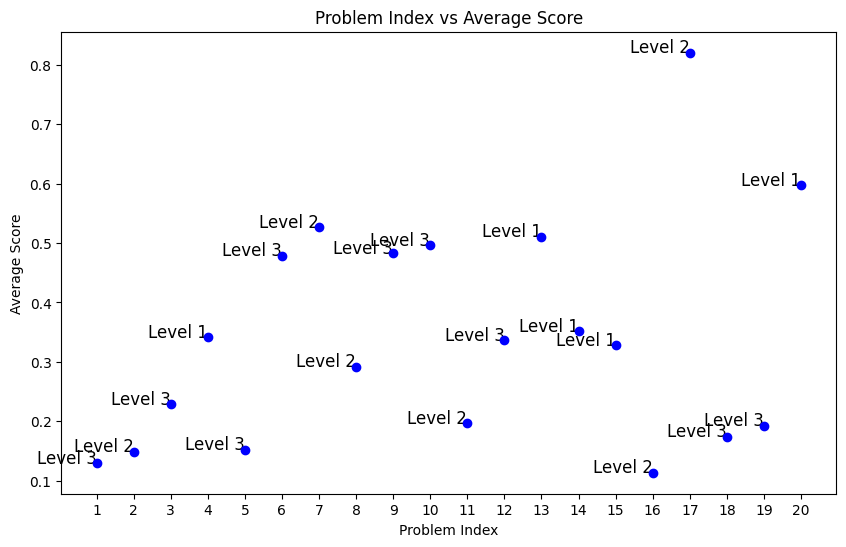

In [32]:
# Plot of average reards scores for problems vs their difficulty levels

# Helps analyse whether the reward model is more confident in its responses for the easier problems.
import numpy as np

avg_scores = [np.mean(scores) for scores in all_scores]

# Create the scatter plot
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(1, 21), avg_scores, c='b', zorder=5)

# Mark the levels with text labels
for i, score in enumerate(avg_scores):
    plt.text(i+1, score, f'Level {levels[i]}', fontsize=12, ha='right')

# Labeling the axes and title
plt.xlabel('Problem Index')
plt.ylabel('Average Score')
plt.title('Problem Index vs Average Score')

# Set the x-axis to have ticks from 1 to 20
plt.xticks(range(1, 21))

# Display the plot
plt.show()

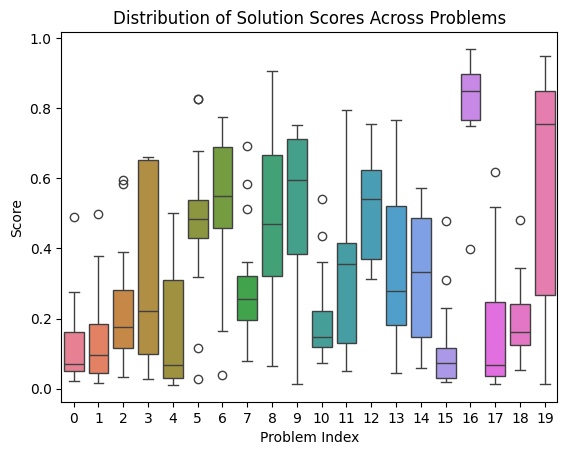

In [20]:
# Box Plot of scores for all 16 answers for each problem
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming all_scores is of shape (20 problems, 16 solutions)
all_scores = np.array(all_scores)

sns.boxplot(data=all_scores.T)

plt.title('Distribution of Solution Scores Across Problems')
plt.xlabel('Problem Index')
plt.ylabel('Score')
plt.show()


                Levels: 3, 2, 3, 1, 3, 3, 2, 2, 3, 3, 2, 3, 1, 1, 1, 2, 2, 3, 3, 1

The wider distribution of solution scores for certain problems suggests that there may be room for improvement in model. One potential cause for this variability could be related to the sampling methods (such as temperature, top-k, or top-p settings), which can introduce randomness into the solutions. For future work, I'd like to experiment with a lower temperature.



# Additional considerations:


-> If time permits I'd like to measure the inference time for Best of N compared to greedy decoding to analyze if the accuracy improvement justifies the additional computational cost.

-> Explore whether some intermediate results can be cached.

-> Experiment with different values of N for various difficulty levels to measure how performance changes and Explore how reward modelling behaves with smaller vs. larger N values. Does a larger N always improve the accuracy?

-> Evaluate the types of errors: Are they due to incomplete responses, incorrect logical reasoning or incorrect output format?

